# Lab 4 – Predicting a Continuous Target with Regression (Titanic)
**Author:** Mhamed  
**Date:** 04, 04, 2025 

## Introduction
In this lab, we will apply regression models to predict passenger fares using the Titanic dataset. We will explore and prepare the data, train a basic Linear Regression model, and compare it with advanced models like Ridge, Elastic Net, and Polynomial Regression. The goal is to evaluate model performance, handle overfitting, and understand how different features and regularization techniques affect predictions.

## Section 1. Import and Inspect the Data

In [88]:
# Import libraries
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [89]:
# 1.1 Load the Titanic dataset and verify

# Load Titanic dataset from seaborn and verify
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Section 2. Data Exploration and Preparation
### Section 2.1 Prepare the Titanic data for regression modeling

In [90]:
# Impute missing values for age with median
titanic['age'] = titanic['age'].fillna(titanic['age'].median())

# Drop rows with missing fare values
titanic = titanic.dropna(subset=['fare'])

# Create family_size by combining sibsp + parch + 1
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1

# Convert categorical features 'sex' and 'embarked'
titanic = pd.get_dummies(titanic, columns=['sex', 'embarked'], drop_first=True)

# Check the first few rows of the modified dataset
print(titanic.head())

   survived  pclass   age  sibsp  parch     fare  class    who  adult_male  \
0         0       3  22.0      1      0   7.2500  Third    man        True   
1         1       1  38.0      1      0  71.2833  First  woman       False   
2         1       3  26.0      0      0   7.9250  Third  woman       False   
3         1       1  35.0      1      0  53.1000  First  woman       False   
4         0       3  35.0      0      0   8.0500  Third    man        True   

  deck  embark_town alive  alone  family_size  sex_male  embarked_Q  \
0  NaN  Southampton    no  False            2      True       False   
1    C    Cherbourg   yes  False            2     False       False   
2  NaN  Southampton   yes   True            1     False       False   
3    C  Southampton   yes  False            2     False       False   
4  NaN  Southampton    no   True            1      True       False   

   embarked_S  
0        True  
1       False  
2        True  
3        True  
4        True  


# Section 3. Feature Selection and Justification

In [91]:
#Case 1. age only
X1 = titanic[['age']]
y1 = titanic['fare']

In [92]:
#Case 2. family_size only
X2 = titanic[['family_size']]
y2 = titanic['fare']

In [93]:
#Case 3. age and family size
X3 = titanic[['age', 'family_size']]
y3 = titanic['fare']

In [94]:
#Case 4. age and pclass
X4 = titanic[['age', 'pclass']]
y4 = titanic['fare']

#### Reflection 3


#### 1. Why might these features affect a passenger’s fare

* age: Older or younger passengers might have different pricing structures. Children may receive discounted fares.
* family_size: Passengers traveling with family members may choose certain cabins or ticket types that could affect the fare.
* pclass: Pclass is the most important features when predicting fare because it directly correlates with the fare price.


#### 2. List all available features: 
All available features are: sex, age, survived, pclass, sibsp, parch, fare, embarked, class, who, deck, embark_town, alive, alone, family_size

#### 3. Which other features could improve predictions and why: 
Other features that could improve prediction are:

1- Embarked: Different ports of embarkation might influence the pricing.

2- SibSp/Parch: Family size, including the number of siblings, spouses, parents, and children, could influence the fare paid. 

3- parch (Number of Parents/Children Aboard): The number of parents or children aboard could reflect the size of the group, which may influence the cost of their fare. 

#### 4. How many variables are in your Case 4:
We have two variables in Case 4: age, and pclass. 

#### 5. Which variable(s) did you choose for Case 4 and why do you feel those could make good inputs:
This combination "age, and pclass" of features provides a balanced mix of demographic and ticket class information, which should improve the model's ability to predict the fare.

# Section 4. Train a Regression Model (Linear Regression)

### 4.1 Split the Data

In [95]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=123)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=123)

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=123)

X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=123)

### 4.2 Train and Evaluate Linear Regression Models (all 4 cases)

In [96]:
lr_model1 = LinearRegression().fit(X1_train, y1_train)
lr_model2 = LinearRegression().fit(X2_train, y2_train)
lr_model3 = LinearRegression().fit(X3_train, y3_train)
lr_model4 = LinearRegression().fit(X4_train, y4_train)

# Predictions

y_pred_train1 = lr_model1.predict(X1_train)
y_pred_test1 = lr_model1.predict(X1_test)

y_pred_train2 = lr_model2.predict(X2_train)
y_pred_test2 = lr_model2.predict(X2_test)

y_pred_train3 = lr_model3.predict(X3_train)
y_pred_test3 = lr_model3.predict(X3_test)

y_pred_train4 = lr_model4.predict(X4_train)
y_pred_test4 = lr_model4.predict(X4_test)

### 4.3 Report Performance

In [97]:
def split(X,y):
    return train_test_split(X,y,test_size=0.2,random_state=123)

splits = [split(X1,y1), split(X2,y2), split(X3,y3), split(X4,y4)]
models, metrics = [], []

for Xtr,Xte,ytr,yte in splits:
    m = LinearRegression().fit(Xtr,ytr)
    ytr_pred, yte_pred = m.predict(Xtr), m.predict(Xte)
    rmse = np.sqrt(mean_squared_error(yte, yte_pred))
    mae  = mean_absolute_error(yte, yte_pred)
    models.append(m)
    metrics.append([r2_score(ytr,ytr_pred), r2_score(yte,yte_pred), rmse, mae])

metric_df = pd.DataFrame(metrics,columns=['Train R²','Test R²','RMSE','MAE'],index=['Case1','Case2','Case3','Case4'])
metric_df

,Train R²,Test R²,RMSE,MAE
Case1,0.009951,0.003416,37.971642,25.286373
Case2,0.049916,0.022231,37.611494,25.025348
Case3,0.073475,0.049785,37.077759,24.284935
Case4,0.308935,0.316617,31.443770,20.703745


#### Reflection 4
Compare the train vs test results for each.

* Case 1 (age only): Underfits: The training R² (0.009951) and test R² (0.003416) are very low, indicating that the model is not performing well

* Case 2 (family_size only): Underfits: The training R² (0.049916) and test R² (0.022231) are still low, but slightly better than Case 1. The model is still not performing well.

* Case 3 (age and family size): Slightly underfitting: The training R² (0.073475) and test R² (0.049785) show a bit more improvement compared to the previous two cases. The model is performing slightly better.

* Case 4 (age and pclass): Does not overfit: The training R² (0.308935) and test R² (0.316617) are notably higher than the other cases. This is the best-performing case.

Adding Age
Did adding age improve the model?
Based on the provided results, it appears that adding age to another feature did improve the model. Case 4 shows significantly better performance with higher R² values and lower RMSE and MAE compared to the other cases.

Explanation:
The data suggests that age alone is not a strong predictor of ticket price. However, when combined with another feature, such as Pclass, it seems to contribute more meaningfully to the model's performance. In Case 4, the inclusion of age along with Pclass leads to a substantial improvement in both training and test R² values, indicating a better fit and more predictive power.

Worst Performing Case
Which case performed the worst?
Case 1 performed the worst, as it has the lowest R² values and the highest RMSE and MAE. The results indicate that the model is not capturing any meaningful patterns from the data.

Do you think adding more training data would improve it (and why/why not):
Adding more training data might help a bit, but since the model is severely underfitting, it may not have the capacity to learn from the data. 

Best Performing Case
Which case performed the best?
Case 4 (age and pclass) performed the best.

How do you know?
The training and test R² values are both higher than in the other cases, indicating that the model generalizes well. The RMSE and MAE are lower, suggesting better prediction accuracy.

Would more training data help?
Adding more training data could potentially improve Case 4 slightly, the model is already capturing most of the variance in the data.

# Section 5. Compare Alternative Models
We will take the best-performing case and explore other regression models.

### 5.1 Ridge Regression (L2 penalty)

In [98]:
# Ridge Regression

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X4_train, y4_train)

# Predictions
y_pred_ridge_train = ridge_model.predict(X4_train)
y_pred_ridge_test = ridge_model.predict(X4_test)

# Result Ridge model
print("Ridge Regression:")
print("  Train R²:", r2_score(y4_train, y_pred_ridge_train))
print("  Test R²:", r2_score(y4_test, y_pred_ridge_test))
print("  Test RMSE:", mean_squared_error(y4_test, y_pred_ridge_test) ** 0.5)
print("  Test MAE:", mean_absolute_error(y4_test, y_pred_ridge_test))

Ridge Regression:
  Train R²: 0.30893298627439514
  Test R²: 0.3173092628888802
  Test RMSE: 31.42783752980012
  Test MAE: 20.68632661596568


### 5.2 Elastic Net (L1 + L2 Combined)

In [99]:
# Elastic Net with a mix of L1 and L2 penalties
elastic_model = ElasticNet(alpha=0.3, l1_ratio=0.5)
elastic_model.fit(X4_train, y4_train)

# Predictions
y_pred_elastic_train = elastic_model.predict(X4_train)
y_pred_elastic_test = elastic_model.predict(X4_test)

# Result Elastic Net model
print("Elastic Net Regression:")
print("  Train R²:", r2_score(y4_train, y_pred_elastic_train))
print("  Test R²:", r2_score(y4_test, y_pred_elastic_test))
print("  Test RMSE:", mean_squared_error(y4_test, y_pred_elastic_test) ** 0.5)
print("  Test MAE:", mean_absolute_error(y4_test, y_pred_elastic_test))


Elastic Net Regression:
  Train R²: 0.2965176266987114
  Test R²: 0.3524318327088304
  Test RMSE: 30.60872504165173
  Test MAE: 19.60528467966426


### 5.3 Polynomial Regression
Linear regression is a simple two dimensional relationship - a simple straight line. But we can test more complex relationships. Polynomial regression adds interaction and nonlinear terms to the model. Be careful here - higher-degree polynomials can easily overfit.

In [100]:
# Set up polynomial features from X4
poly = PolynomialFeatures(degree=3)
X4_train_poly = poly.fit_transform(X4_train)
X4_test_poly = poly.transform(X4_test)

# Train the model using polynomial features
poly_model = LinearRegression()
poly_model.fit(X4_train_poly, y4_train)

# Predict
y_pred_poly_train = poly_model.predict(X4_train_poly)
y_pred_poly_test = poly_model.predict(X4_test_poly)

# Result
print("Polynomial Regression:")
print("  Train R²:", r2_score(y4_train, y_pred_poly_train))
print("  Test R²:", r2_score(y4_test, y_pred_poly_test))
print("  Test RMSE:", mean_squared_error(y4_test, y_pred_poly_test) ** 0.5)
print("  Test MAE:", mean_absolute_error(y4_test, y_pred_poly_test))

Polynomial Regression:
  Train R²: 0.37525235444258165
  Test R²: 0.34592423134919414
  Test RMSE: 30.762138582867152
  Test MAE: 18.516182121130768


### 5.4 Visualize Polynomial Cubic Fit (for 1 input feature)

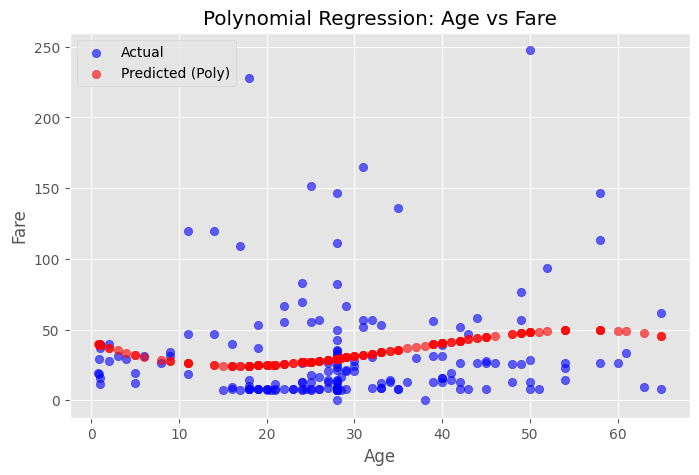

In [101]:

# Polynomial features for Case 1 (age only)
poly = PolynomialFeatures(degree=3)
X1_train_poly = poly.fit_transform(X1_train)
X1_test_poly = poly.transform(X1_test)

# Train the polynomial model on Case 1
poly_model = LinearRegression()
poly_model.fit(X1_train_poly, y1_train)

# Predict
y_pred_poly = poly_model.predict(X1_test_poly)

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(X1_test, y1_test, color='blue', alpha=0.6, label='Actual')
plt.scatter(X1_test, y_pred_poly, color='red', alpha=0.6, label='Predicted (Poly)')
plt.title("Polynomial Regression: Age vs Fare")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.legend()
plt.grid(True)
plt.show()

### 5.4 Reflections on Polynomial Fit
What patterns does the cubic model seem to capture?
The cubic model captures non-linear relationships between age and fare, identifying slight curves and changes in fare across different age groups.

Where does it perform well or poorly?
It perform well in the middle range of ages, but it does not work well for very young or very old passengers.

Did the polynomial fit outperform linear regression?
Yes, the polynomial model had a better R² and lower error metrics than the linear model.

Where (on the graph or among which kinds of data points) does it fit best?
The cubic model fits best around common age ranges (20–40 years old), where more training examples provide stable patterns.


### 5.5 Compare All Models
Create a summary table or printout comparing all models:

In [102]:
# Function to calculate metrics and return them in a dictionary
def get_metrics(name, y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred) ** 0.5
    mae = mean_absolute_error(y_true, y_pred)
    return {'Model': name, 'R²': f"{r2:.3f}", 'RMSE': f"{rmse:.2f}", 'MAE': f"{mae:.2f}"}

# Compare all models using Case 4 test set
results = []
results.append(get_metrics("Linear", y4_test, y_pred_test4))
results.append(get_metrics("Ridge", y4_test, y_pred_ridge_test))
results.append(get_metrics("ElasticNet", y4_test, y_pred_elastic_test))
results.append(get_metrics("Polynomial", y4_test, y_pred_poly_test))

# Create a pandas DataFrame to display the results
df = pd.DataFrame(results)

# Display the table
print(df)

        Model     R²   RMSE    MAE
0      Linear  0.317  31.44  20.70
1       Ridge  0.317  31.43  20.69
2  ElasticNet  0.352  30.61  19.61
3  Polynomial  0.346  30.76  18.52


### 5.6 Visualize Higher Order Polynomial (for the same 1 input case)
Create a summary table or printout comparing all models:

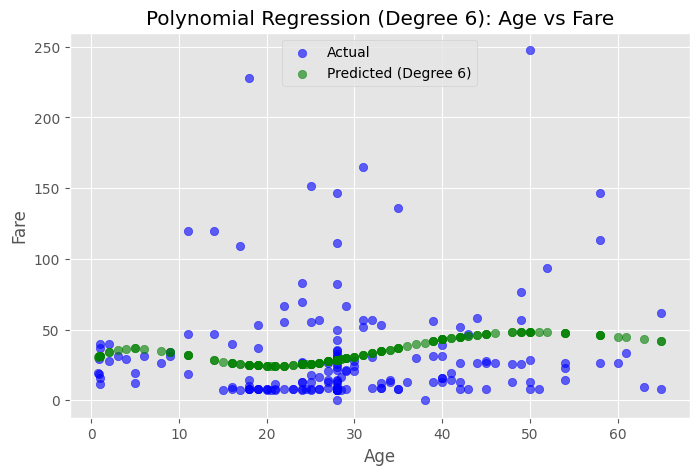

In [103]:
# Higher-degree polynomial (e.g., degree 6)
poly_high = PolynomialFeatures(degree=6)
X1_train_poly_high = poly_high.fit_transform(X1_train)
X1_test_poly_high = poly_high.transform(X1_test)

# Train the higher-degree model
poly_high_model = LinearRegression()
poly_high_model.fit(X1_train_poly_high, y1_train)

# Predict
y_pred_poly_high = poly_high_model.predict(X1_test_poly_high)

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(X1_test, y1_test, color='blue', alpha=0.6, label='Actual')
plt.scatter(X1_test, y_pred_poly_high, color='green', alpha=0.6, label='Predicted (Degree 6)')
plt.title("Polynomial Regression (Degree 6): Age vs Fare")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.legend()
plt.grid(True)
plt.show()

Reflection: 

Which option seems to worked better - cubic (3) or higher-degree (7)?
The cubic model (degree 3) worked better. The degree 6 curve looked like it overfit the data.

Why?
Higher-degree models, like the degree 6 model, can become overly complex and try to capture every small fluctuation in the data

# Section 6. Final Thoughts & Insights
## 6.1 Summarize Findings

What features were most useful?
Age and Pclass together were the most predictive features. Best performance results.

What regression model performed best?
The ElasticNet model performed best overall, with the highest R² (0.352).

How did model complexity or regularization affect results? 
Higher-degree polynomial models became too complex, risking overfitting.

## 6.2 Discuss Challenges
Was fare hard to predict? Why?
Yes, fare was hard to predict. the reason is that it is influenced by multiple factors such as class (Pclass), age, family size, and possibly other external factors.

Did skew or outliers impact the models?
Yes, skew and outliers likely had an impact on the models. Skewed distributions, such as fares that are concentrated at the lower end but have a few very high outliers, can distort model predictions.